In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r'D:\Project\project_structure\project-structure-ewb\data\raw\easyview.csv')
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [3]:
df.shape

(25480, 12)

In [4]:
df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [5]:
df.drop(columns='case_id',inplace=True)

In [6]:
df.shape

(25480, 11)

In [7]:
from datetime import date

In [8]:
current_year = date.today().year
current_year

2024

In [9]:
df['company_age'] = current_year - df['yr_of_estab']
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,17
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,22
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,16
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,127
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,19


In [10]:
df.drop(columns='yr_of_estab',inplace=True)

In [11]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 3


In [12]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 8


In [13]:
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))

Num of Discrete Features : 0


In [14]:
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Continuous Features : 3


In [15]:
X = df.drop('case_status', axis=1)
y = df['case_status']

In [16]:
X.shape, y.shape

((25480, 10), (25480,))

In [17]:
X[num_features].skew()

no_of_employees    12.265260
prevailing_wage     0.755776
company_age         2.037301
dtype: float64

In [18]:
X

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,company_age
0,Asia,High School,N,N,14513,West,592.2029,Hour,Y,17
1,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,22
2,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,16
3,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,127
4,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,19
...,...,...,...,...,...,...,...,...,...,...
25475,Asia,Bachelor's,Y,Y,2601,South,77092.5700,Year,Y,16
25476,Asia,High School,Y,N,3274,Northeast,279174.7900,Year,Y,18
25477,Asia,Master's,Y,N,1121,South,146298.8500,Year,N,114
25478,Asia,Master's,Y,Y,1918,West,86154.7700,Year,Y,137


In [19]:
from sklearn.preprocessing import LabelEncoder  

In [20]:
le = LabelEncoder()

In [21]:
y

0           Denied
1        Certified
2           Denied
3           Denied
4        Certified
           ...    
25475    Certified
25476    Certified
25477    Certified
25478    Certified
25479    Certified
Name: case_status, Length: 25480, dtype: object

In [22]:
pd.Series(y).value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

In [23]:
y= np.where(y=='Denied', 0,1)

In [24]:
pd.Series(y).value_counts()

1    17018
0     8462
Name: count, dtype: int64

In [25]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, PowerTransformer, FunctionTransformer, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [26]:
X_new = X.copy()

In [27]:
X_new.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,company_age
0,Asia,High School,N,N,14513,West,592.2029,Hour,Y,17
1,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,22
2,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,16
3,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,127
4,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,19


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y , test_size=0.3, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17836, 10), (7644, 10), (17836,), (7644,))

In [30]:
pd.Series(y_train).value_counts()

1    11913
0     5923
Name: count, dtype: int64

In [31]:
pd.Series(y_test).value_counts()

1    5105
0    2539
Name: count, dtype: int64

In [32]:
ss = StandardScaler()
ohe = OneHotEncoder(sparse_output=False,drop='first')

yeo_johnson = PowerTransformer(method='yeo-johnson')
box_cox = PowerTransformer(method='box-cox')
sqrt_tranform = FunctionTransformer(np.sqrt)

In [33]:
# Create Column Transformer with 3 types of transformers

ordinal_cols = ['education_of_employee','has_job_experience','requires_job_training','full_time_position']

ohe_cols = ['continent','region_of_employment','unit_of_wage']

yeo_cols = ['no_of_employees']

box_cox_cols = ['company_age']

sqrt_cols = ['prevailing_wage']

### one_hot_encoding starts

In [34]:
X_train[ohe_cols]

,continent,region_of_employment,unit_of_wage
19643,Europe,Northeast,Month
17663,Asia,South,Year
14342,Asia,South,Year
8854,Asia,South,Year
7811,Asia,West,Year
...,...,...,...
25395,North America,South,Year
14659,Asia,South,Year
3279,Asia,Midwest,Year
12133,Asia,Midwest,Year


In [35]:
for i in X_train[ohe_cols].columns:
    print(X_train[ohe_cols][i].value_counts())

continent
Asia             11823
Europe            2600
North America     2290
South America      599
Africa             375
Oceania            149
Name: count, dtype: int64
region_of_employment
Northeast    5025
South        4971
West         4582
Midwest      3000
Island        258
Name: count, dtype: int64
unit_of_wage
Year     16074
Hour      1504
Week       194
Month       64
Name: count, dtype: int64


In [36]:
X_train_trf = ohe.fit_transform(X_train[ohe_cols])
X_train_trf

array([[0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [37]:
X_train_trf.shape

(17836, 12)

In [38]:
X_test_trf = ohe.transform(X_test[ohe_cols])
X_test_trf

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [39]:
X_test_trf.shape

(7644, 12)

In [40]:
ohe.get_feature_names_out()

array(['continent_Asia', 'continent_Europe', 'continent_North America',
       'continent_Oceania', 'continent_South America',
       'region_of_employment_Midwest', 'region_of_employment_Northeast',
       'region_of_employment_South', 'region_of_employment_West',
       'unit_of_wage_Month', 'unit_of_wage_Week', 'unit_of_wage_Year'],
      dtype=object)

In [41]:
X_train_trf = pd.DataFrame(X_train_trf,columns=ohe.get_feature_names_out())
X_train_trf

,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17831,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
17832,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
17833,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
17834,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [42]:
X_test_trf = pd.DataFrame(X_test_trf,columns=ohe.get_feature_names_out())
X_test_trf

,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7639,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7640,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7641,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7642,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [43]:
X_train.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,company_age
19643,Europe,Master's,N,Y,893,Northeast,141964.49,Month,Y,28
17663,Asia,Doctorate,N,Y,1850,South,127273.02,Year,Y,25
14342,Asia,Bachelor's,Y,N,1475,South,77724.07,Year,Y,25
8854,Asia,Master's,Y,N,2877,South,60777.57,Year,Y,49
7811,Asia,Bachelor's,Y,N,523,West,50633.23,Year,Y,21


In [44]:
type(X_train)

pandas.core.frame.DataFrame

In [45]:
X_train.drop(columns=ohe_cols,inplace=True)
X_train.reset_index(drop=True, inplace=True)
X_test.drop(columns=ohe_cols,inplace=True)
X_test.reset_index(drop=True, inplace=True)


In [46]:

X_train_trf.reset_index(drop=True, inplace=True)
X_test_trf.reset_index(drop=True, inplace=True)

In [47]:
X_train.shape, X_train_trf.shape

((17836, 7), (17836, 12))

In [48]:
X_test.shape, X_test_trf.shape

((7644, 7), (7644, 12))

In [49]:
X_train.head()

,education_of_employee,has_job_experience,requires_job_training,no_of_employees,prevailing_wage,full_time_position,company_age
0,Master's,N,Y,893,141964.49,Y,28
1,Doctorate,N,Y,1850,127273.02,Y,25
2,Bachelor's,Y,N,1475,77724.07,Y,25
3,Master's,Y,N,2877,60777.57,Y,49
4,Bachelor's,Y,N,523,50633.23,Y,21


In [50]:
X_train_trf.head()

,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [51]:
X_train = pd.concat([X_train, X_train_trf],axis=1)
X_train

,education_of_employee,has_job_experience,requires_job_training,no_of_employees,prevailing_wage,full_time_position,company_age,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year
0,Master's,N,Y,893,141964.49,Y,28,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,Doctorate,N,Y,1850,127273.02,Y,25,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,Bachelor's,Y,N,1475,77724.07,Y,25,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,Master's,Y,N,2877,60777.57,Y,49,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,Bachelor's,Y,N,523,50633.23,Y,21,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17831,Master's,Y,N,2309,65372.52,Y,65,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
17832,High School,Y,N,1870,6910.74,N,62,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
17833,High School,N,N,334,68337.50,Y,24,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
17834,Bachelor's,Y,N,318,15999.93,Y,39,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [52]:
X_test.head()

,education_of_employee,has_job_experience,requires_job_training,no_of_employees,prevailing_wage,full_time_position,company_age
0,Master's,Y,N,3344,101025.68,Y,26
1,Bachelor's,N,N,1080,108924.14,Y,20
2,High School,Y,N,41,49654.90,Y,18
3,Master's,N,N,2283,135276.15,Y,16
4,Master's,N,N,1182,100805.29,N,24


In [53]:
X_test_trf.head()

,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [54]:
X_test.shape, X_test_trf.shape

((7644, 7), (7644, 12))

In [55]:
X_test = pd.concat([X_test, X_test_trf],axis=1)
X_test

,education_of_employee,has_job_experience,requires_job_training,no_of_employees,prevailing_wage,full_time_position,company_age,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year
0,Master's,Y,N,3344,101025.68,Y,26,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,Bachelor's,N,N,1080,108924.14,Y,20,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,High School,Y,N,41,49654.90,Y,18,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,Master's,N,N,2283,135276.15,Y,16,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Master's,N,N,1182,100805.29,N,24,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7639,Bachelor's,Y,N,2879,78964.09,Y,22,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7640,Doctorate,Y,N,4952,99064.05,Y,184,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7641,Master's,N,N,349,21137.82,N,78,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7642,Bachelor's,Y,N,917,42464.19,Y,23,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


### ordinal encoding starts here

In [56]:
ordinal_cols

['education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'full_time_position']

In [57]:
education_order = ['High School',"Bachelor's","Master's",'Doctorate']
experience_order = ['N','Y']
job_training_order = ['Y','N']
position_order = ['N','Y']

In [58]:
ordinal_encode = OrdinalEncoder(categories=[education_order,experience_order,job_training_order,position_order]
                                ,handle_unknown='use_encoded_value', unknown_value=-1)

In [59]:
X_train_trf = ordinal_encode.fit_transform(X_train[ordinal_cols])
X_train.loc[:,ordinal_cols] = X_train_trf
X_train.head()

,education_of_employee,has_job_experience,requires_job_training,no_of_employees,prevailing_wage,full_time_position,company_age,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year
0,2.0,0.0,0.0,893,141964.49,1.0,28,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,3.0,0.0,0.0,1850,127273.02,1.0,25,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,1.0,1.0,1475,77724.07,1.0,25,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,2.0,1.0,1.0,2877,60777.57,1.0,49,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,1.0,1.0,523,50633.23,1.0,21,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [60]:
X_test_trf = ordinal_encode.transform(X_test[ordinal_cols])
X_test.loc[:,ordinal_cols] = X_test_trf
X_test.head()

,education_of_employee,has_job_experience,requires_job_training,no_of_employees,prevailing_wage,full_time_position,company_age,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year
0,2.0,1.0,1.0,3344,101025.68,1.0,26,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,1080,108924.14,1.0,20,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,1.0,41,49654.90,1.0,18,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,2.0,0.0,1.0,2283,135276.15,1.0,16,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2.0,0.0,1.0,1182,100805.29,0.0,24,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [61]:
X_train.shape, X_train_trf.shape

((17836, 19), (17836, 4))

In [62]:
X_test.shape, X_test_trf.shape

((7644, 19), (7644, 4))

In [63]:
ordinal_encode.get_feature_names_out()

array(['education_of_employee', 'has_job_experience',
       'requires_job_training', 'full_time_position'], dtype=object)

### yeo_johnson and box_starts

In [64]:
yeo_cols = ['no_of_employees']

box_cox_cols = ['company_age']

In [65]:
X_train[yeo_cols]

,no_of_employees
0,893
1,1850
2,1475
3,2877
4,523
...,...
17831,2309
17832,1870
17833,334
17834,318


In [66]:
X_train[yeo_cols].describe()

,no_of_employees
count,17836.000000
mean,5387.316887
std,21353.624045
min,-26.000000
25%,1019.750000
50%,2103.500000
75%,3484.000000
max,602069.000000


In [67]:
X_train[X_train['no_of_employees']<0]

,education_of_employee,has_job_experience,requires_job_training,no_of_employees,prevailing_wage,full_time_position,company_age,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year
143,2.0,1.0,1.0,-25,79150.5100,1.0,47,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
517,3.0,1.0,1.0,-14,37012.8000,1.0,35,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1984,2.0,0.0,1.0,-25,39452.9900,1.0,44,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2226,1.0,0.0,0.0,-11,108403.5600,1.0,78,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2973,2.0,1.0,1.0,-17,129701.9400,1.0,22,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3368,0.0,0.0,1.0,-25,99405.4700,0.0,37,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4703,1.0,1.0,0.0,-26,115005.6100,1.0,18,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5269,1.0,1.0,1.0,-25,100463.5800,1.0,24,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5573,1.0,1.0,1.0,-14,691.0609,1.0,44,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5831,1.0,0.0,1.0,-14,103.9700,1.0,11,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [68]:
X_train.shape, X_train[X_train['no_of_employees']<0].shape

((17836, 19), (23, 19))

In [69]:
X_train[X_train['no_of_employees']==12]

,education_of_employee,has_job_experience,requires_job_training,no_of_employees,prevailing_wage,full_time_position,company_age,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year
5771,1.0,0.0,1.0,12,148920.43,1.0,16,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
10824,1.0,0.0,1.0,12,53879.06,1.0,15,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
14596,0.0,1.0,1.0,12,53310.41,1.0,20,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [70]:
X_train[X_train['no_of_employees']>10]['no_of_employees'].min()

12

In [71]:
X[X['no_of_employees']<0].index

Index([  245,   378,   832,  2918,  6439,  6634,  7224,  7281,  7318,  7761,
        9872, 11493, 13471, 14022, 14146, 14726, 15600, 15859, 16157, 16883,
       17006, 17655, 17844, 17983, 20815, 20984, 21255, 21760, 21944, 22084,
       22388, 23186, 23476],
      dtype='int64')

In [72]:
y[X[X['no_of_employees']<0].index]

array([1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0])

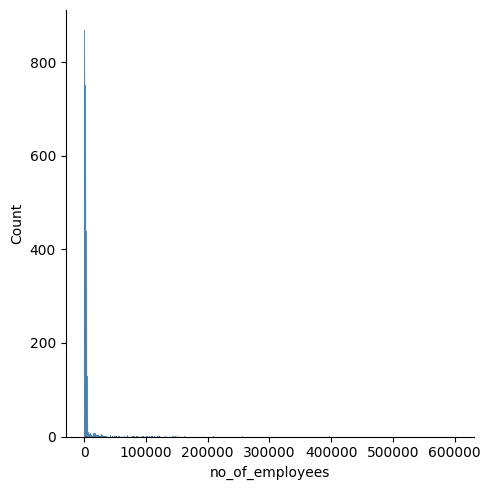

In [73]:
sns.displot(X_train['no_of_employees'])

In [74]:
X_train['no_of_employees'].describe()

count     17836.000000
mean       5387.316887
std       21353.624045
min         -26.000000
25%        1019.750000
50%        2103.500000
75%        3484.000000
max      602069.000000
Name: no_of_employees, dtype: float64

In [75]:
X_train.shape

(17836, 19)

In [76]:
neg_xtrain = X_train[X_train['no_of_employees']<10].index.values
neg_xtrain

array([  143,   517,  1984,  2226,  2973,  3368,  4703,  5269,  5573,
        5831,  7531,  7859,  8029,  8378,  8412,  8508,  9135,  9354,
       11157, 11738, 14772, 16221, 16449], dtype=int64)

In [77]:
neg_xtest = X_test[X_test['no_of_employees']<10].index.values
neg_xtest

array([ 217, 1077, 2947, 3119, 4103, 4394, 4530, 4642, 4757, 5109],
      dtype=int64)

In [78]:
X_train[X_train['no_of_employees']>10]['no_of_employees'].median()

2106.0

In [79]:
X_test[X_test['no_of_employees']>10]['no_of_employees'].median()

2130.0

In [80]:
X_train.iloc[neg_xtrain,3] = X_train[X_train['no_of_employees']>10]['no_of_employees'].median()

In [81]:
X_test.iloc[neg_xtest,3] = X_test[X_test['no_of_employees']>10]['no_of_employees'].median()

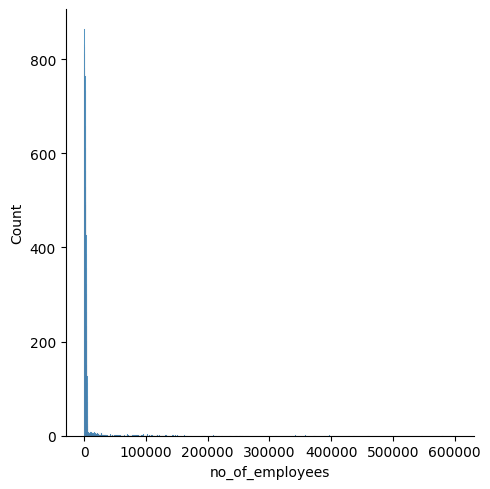

In [82]:
sns.displot(X_train['no_of_employees'])

In [83]:
X_train['no_of_employees'].describe()

count     17836.000000
mean       5390.055786
std       21353.066741
min          12.000000
25%        1023.000000
50%        2106.000000
75%        3484.000000
max      602069.000000
Name: no_of_employees, dtype: float64

In [84]:
X_train['no_of_employees'].skew()

12.858676178731216

### Box-Cox implementation

In [85]:
yeo_cols = ['no_of_employees']

box_cox_cols = ['company_age']

In [86]:
X_train[yeo_cols]

,no_of_employees
0,893
1,1850
2,1475
3,2877
4,523
...,...
17831,2309
17832,1870
17833,334
17834,318


In [87]:
X_train[box_cox_cols].describe()

,company_age
count,17836.000000
mean,44.691411
std,42.349331
min,8.000000
25%,19.000000
50%,27.000000
75%,48.000000
max,224.000000


In [88]:
box_cox_cols = ['no_of_employees', 'company_age']

In [89]:
X_train[box_cox_cols]

,no_of_employees,company_age
0,893,28
1,1850,25
2,1475,25
3,2877,49
4,523,21
...,...,...
17831,2309,65
17832,1870,62
17833,334,24
17834,318,39


In [90]:
box_cox = PowerTransformer(method='yeo-johnson')
sqrt_tranform = FunctionTransformer(np.sqrt)

In [91]:
X_train_trf = box_cox.fit_transform(X_train[box_cox_cols])
X_train_trf

array([[-0.58669857, -0.06179227],
       [ 0.00477853, -0.24703947],
       [-0.17856407, -0.24703947],
       ...,
       [-1.39410588, -0.31625257],
       [-1.43465447,  0.42505253],
       [-0.19859681, -0.24703947]])

In [92]:
X_train.loc[:,box_cox_cols] = X_train_trf
X_train

,education_of_employee,has_job_experience,requires_job_training,no_of_employees,prevailing_wage,full_time_position,company_age,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year
0,2.0,0.0,0.0,-0.586699,141964.49,1.0,-0.061792,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,3.0,0.0,0.0,0.004779,127273.02,1.0,-0.247039,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,1.0,1.0,-0.178564,77724.07,1.0,-0.247039,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,2.0,1.0,1.0,0.360546,60777.57,1.0,0.716996,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,1.0,1.0,-1.024739,50633.23,1.0,-0.552163,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17831,2.0,1.0,1.0,0.183613,65372.52,1.0,1.034909,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
17832,0.0,1.0,1.0,0.013467,6910.74,0.0,0.984868,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
17833,0.0,0.0,1.0,-1.394106,68337.50,1.0,-0.316253,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
17834,1.0,1.0,1.0,-1.434654,15999.93,1.0,0.425053,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [93]:
X_test_trf = box_cox.transform(X_test[box_cox_cols])
X_test.loc[:,box_cox_cols] = X_test_trf

In [94]:
X_test

,education_of_employee,has_job_experience,requires_job_training,no_of_employees,prevailing_wage,full_time_position,company_age,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year
0,2.0,1.0,1.0,0.481249,101025.68,1.0,-0.181792,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,-0.431749,108924.14,1.0,-0.642085,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,1.0,-3.139350,49654.90,1.0,-0.843279,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,2.0,0.0,1.0,0.174489,135276.15,1.0,-1.079844,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2.0,0.0,1.0,-0.358336,100805.29,0.0,-0.316253,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7639,1.0,1.0,1.0,0.361104,78964.09,1.0,-0.468298,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7640,3.0,1.0,1.0,0.795129,99064.05,1.0,1.877200,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7641,2.0,0.0,1.0,-1.357837,21137.82,0.0,1.217042,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7642,1.0,1.0,1.0,-0.565062,42464.19,1.0,-0.389846,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


### square root transform

### scaling the data

In [95]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled,columns=scaler.get_feature_names_out())

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=scaler.get_feature_names_out())

In [96]:
scaler.get_feature_names_out()

array(['education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'prevailing_wage',
       'full_time_position', 'company_age', 'continent_Asia',
       'continent_Europe', 'continent_North America', 'continent_Oceania',
       'continent_South America', 'region_of_employment_Midwest',
       'region_of_employment_Northeast', 'region_of_employment_South',
       'region_of_employment_West', 'unit_of_wage_Month',
       'unit_of_wage_Week', 'unit_of_wage_Year'], dtype=object)

In [97]:
X_train_scaled

,education_of_employee,has_job_experience,requires_job_training,no_of_employees,prevailing_wage,full_time_position,company_age,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year
0,0.707259,-1.176509,-2.768875,-0.586699,1.283067,0.348235,-0.061792,-1.402227,2.420744,-0.383803,-0.091784,-0.186416,-0.449679,1.596701,-0.621609,-0.587968,16.663958,-0.104864,-3.020362
1,1.914519,-1.176509,-2.768875,0.004779,1.003886,0.348235,-0.247039,0.713151,-0.413096,-0.383803,-0.091784,-0.186416,-0.449679,-0.626291,1.608729,-0.587968,-0.060010,-0.104864,0.331086
2,-0.500002,0.849972,0.361158,-0.178564,0.062312,0.348235,-0.247039,0.713151,-0.413096,-0.383803,-0.091784,-0.186416,-0.449679,-0.626291,1.608729,-0.587968,-0.060010,-0.104864,0.331086
3,0.707259,0.849972,0.361158,0.360546,-0.259721,0.348235,0.716996,0.713151,-0.413096,-0.383803,-0.091784,-0.186416,-0.449679,-0.626291,1.608729,-0.587968,-0.060010,-0.104864,0.331086
4,-0.500002,0.849972,0.361158,-1.024739,-0.452493,0.348235,-0.552163,0.713151,-0.413096,-0.383803,-0.091784,-0.186416,-0.449679,-0.626291,-0.621609,1.700771,-0.060010,-0.104864,0.331086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17831,0.707259,0.849972,0.361158,0.183613,-0.172404,0.348235,1.034909,-1.402227,-0.413096,2.605503,-0.091784,-0.186416,-0.449679,-0.626291,1.608729,-0.587968,-0.060010,-0.104864,0.331086
17832,-1.707262,0.849972,0.361158,0.013467,-1.283348,-2.871627,0.984868,0.713151,-0.413096,-0.383803,-0.091784,-0.186416,-0.449679,-0.626291,1.608729,-0.587968,-0.060010,-0.104864,0.331086
17833,-1.707262,-1.176509,0.361158,-1.394106,-0.116060,0.348235,-0.316253,0.713151,-0.413096,-0.383803,-0.091784,-0.186416,2.223811,-0.626291,-0.621609,-0.587968,-0.060010,-0.104864,0.331086
17834,-0.500002,0.849972,0.361158,-1.434654,-1.110627,0.348235,0.425053,0.713151,-0.413096,-0.383803,-0.091784,-0.186416,2.223811,-0.626291,-0.621609,-0.587968,-0.060010,-0.104864,0.331086


<Axes: xlabel='prevailing_wage', ylabel='Density'>

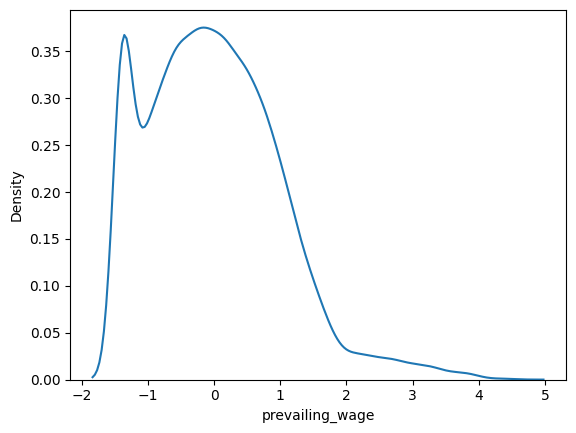

In [98]:
sns.kdeplot(X_train_scaled['prevailing_wage'])

### Model building

In [99]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [100]:
from sklearn.metrics import (accuracy_score, classification_report, ConfusionMatrixDisplay, precision_score,
                             recall_score, f1_score, roc_auc_score, roc_curve)

In [101]:
def evaluation(true, predicted):
    acc = accuracy_score(true, predicted)
    f1 = f1_score(true, predicted)
    precision = precision_score(true, predicted)
    recall = recall_score(true, predicted)
    roc_auc =   roc_auc_score(true, predicted)
    return acc , f1, precision, recall, roc_auc

In [102]:
models = {
    "LogisticRegression" : LogisticRegression(max_iter=400),
    "SVC" : SVC(),
    "KNN Classifier" : KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XG Boost Classifier" : XGBClassifier(),
    "Catboost Classifier" : CatBoostClassifier()
}

In [103]:
for i in models.values():
    print(i)

LogisticRegression(max_iter=400)
SVC()
KNeighborsClassifier()
RandomForestClassifier()
DecisionTreeClassifier()
GradientBoostingClassifier()
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [104]:
new_df =pd.DataFrame(columns=['model_train_acc' , 'model_train_f1_score', 'model_train_precision', 'model_train_recall', 
                              'model_train_roc_auc','model_test_acc' , 'model_test_f1_score', 'model_test_precision', 'model_test_recall', 'model_test_roc_auc'])

In [105]:
def evaluate_model(X_train_scaled, y_train, X_test_scaled,y_test)-> pd.DataFrame:
    
    new_df =pd.DataFrame(columns=['model_name','model_train_acc' , 'model_train_f1_score', 'model_train_precision', 'model_train_recall', 'model_train_roc_auc',
                                  'model_test_acc' , 'model_test_f1_score', 'model_test_precision', 'model_test_recall', 'model_test_roc_auc'])
    
    for i , model in enumerate(models.values()):
        
        new_df.loc[i,'model_name'] = model
        model.fit(X_train_scaled, y_train)
        
        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled) 
        
        
        # train data accuracy
        model_train_acc , model_train_f1_score, model_train_precision, model_train_recall, model_train_roc_auc = evaluation(y_train,y_train_pred)
       
        # test data accuracy
        model_test_acc , model_test_f1_score, model_test_precision, model_test_recall, model_test_roc_auc = evaluation(y_test,y_test_pred)
        
        
        
        new_df.loc[i,['model_train_acc' , 'model_train_f1_score', 'model_train_precision', 'model_train_recall', 'model_train_roc_auc']] = model_train_acc , model_train_f1_score, model_train_precision, model_train_recall, model_train_roc_auc
        new_df.loc[i,['model_test_acc' , 'model_test_f1_score', 'model_test_precision', 'model_test_recall', 'model_test_roc_auc']] = model_test_acc , model_test_f1_score, model_test_precision, model_test_recall, model_test_roc_auc
        
    return new_df

In [106]:
new_df = evaluate_model(X_train_scaled, y_train, X_test_scaled,y_test)
new_df

Learning rate set to 0.035256
0:	learn: 0.6809294	total: 146ms	remaining: 2m 26s
1:	learn: 0.6694401	total: 151ms	remaining: 1m 15s
2:	learn: 0.6591852	total: 155ms	remaining: 51.5s
3:	learn: 0.6489474	total: 160ms	remaining: 39.8s
4:	learn: 0.6393386	total: 165ms	remaining: 32.8s
5:	learn: 0.6306805	total: 171ms	remaining: 28.3s
6:	learn: 0.6239188	total: 176ms	remaining: 25s
7:	learn: 0.6165618	total: 181ms	remaining: 22.5s
8:	learn: 0.6098261	total: 187ms	remaining: 20.5s
9:	learn: 0.6041097	total: 191ms	remaining: 18.9s
10:	learn: 0.5983397	total: 196ms	remaining: 17.6s
11:	learn: 0.5936282	total: 201ms	remaining: 16.5s
12:	learn: 0.5881891	total: 207ms	remaining: 15.7s
13:	learn: 0.5837191	total: 212ms	remaining: 14.9s
14:	learn: 0.5794054	total: 217ms	remaining: 14.3s
15:	learn: 0.5752955	total: 226ms	remaining: 13.9s
16:	learn: 0.5714759	total: 233ms	remaining: 13.5s
17:	learn: 0.5690632	total: 239ms	remaining: 13s
18:	learn: 0.5658149	total: 246ms	remaining: 12.7s
19:	learn: 0.

,model_name,model_train_acc,model_train_f1_score,model_train_precision,model_train_recall,model_train_roc_auc,model_test_acc,model_test_f1_score,model_test_precision,model_test_recall,model_test_roc_auc
0,LogisticRegression(max_iter=400),0.736152,0.817356,0.760124,0.883908,0.661438,0.728807,0.812313,0.755219,0.878746,0.65304
1,SVC(),0.761494,0.830599,0.790136,0.87543,0.703881,0.743066,0.818283,0.775381,0.86621,0.68084
2,KNeighborsClassifier(),0.798161,0.854792,0.822735,0.889449,0.752001,0.707091,0.789587,0.758851,0.822919,0.648561
3,"(DecisionTreeClassifier(max_features='sqrt', r...",1.0,1.0,1.0,1.0,1.0,0.724882,0.803182,0.768996,0.840548,0.666434
4,DecisionTreeClassifier(),1.0,1.0,1.0,1.0,1.0,0.656463,0.742549,0.743278,0.741822,0.613329
5,([DecisionTreeRegressor(criterion='friedman_ms...,0.758746,0.829415,0.785832,0.878116,0.698386,0.74359,0.819554,0.773146,0.87189,0.678757
6,"XGBClassifier(base_score=None, booster=None, c...",0.846322,0.890109,0.851957,0.931839,0.80308,0.731293,0.810342,0.766463,0.859549,0.666482
7,<catboost.core.CatBoostClassifier object at 0x...,0.795806,0.855304,0.811948,0.903551,0.741325,0.739665,0.816792,0.77054,0.868952,0.674334


### treat Imbalanced Data and train model again 

In [107]:
from imblearn.combine import SMOTETomek, SMOTEENN

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTEENN(random_state=42 )
# Fit the model to generate the data.
X_train_resampled, y_train_resampled = smt.fit_resample(X_train_scaled, y_train)

In [108]:
pd.Series(y_train_resampled).value_counts()

0    6466
1    5600
Name: count, dtype: int64

In [109]:
new_df =pd.DataFrame(columns=['model_train_acc' , 'model_train_f1_score', 'model_train_precision', 'model_train_recall', 
                              'model_train_roc_auc','model_test_acc' , 'model_test_f1_score', 'model_test_precision', 'model_test_recall', 'model_test_roc_auc'])

In [110]:
def evaluation(true, predicted):
    acc = accuracy_score(true, predicted)
    f1 = f1_score(true, predicted)
    precision = precision_score(true, predicted)
    recall = recall_score(true, predicted)
    roc_auc =   roc_auc_score(true, predicted)
    return acc , f1, precision, recall, roc_auc

In [111]:
def evaluate_model(X_train_resampled, y_train_resampled, X_test_scaled,y_test)-> float:
    
    new_df =pd.DataFrame(columns=['model_name','model_train_acc' , 'model_train_f1_score', 'model_train_precision', 'model_train_recall', 'model_train_roc_auc',
                                  'model_test_acc' , 'model_test_f1_score', 'model_test_precision', 'model_test_recall', 'model_test_roc_auc'])
    
    for i , model in enumerate(models.values()):
        
        new_df.loc[i,'model_name'] = model
        model.fit(X_train_resampled, y_train_resampled)
        
        y_train_pred = model.predict(X_train_resampled)
        y_test_pred = model.predict(X_test_scaled) 
        
        
        # train data accuracy
        model_train_acc , model_train_f1_score, model_train_precision, model_train_recall, model_train_roc_auc = evaluation(y_train_resampled,y_train_pred)
       
        # test data accuracy
        model_test_acc , model_test_f1_score, model_test_precision, model_test_recall, model_test_roc_auc = evaluation(y_test,y_test_pred)
        
        
        
        new_df.loc[i,['model_train_acc' , 'model_train_f1_score', 'model_train_precision', 'model_train_recall', 'model_train_roc_auc']] = model_train_acc , model_train_f1_score, model_train_precision, model_train_recall, model_train_roc_auc
        new_df.loc[i,['model_test_acc' , 'model_test_f1_score', 'model_test_precision', 'model_test_recall', 'model_test_roc_auc']] = model_test_acc , model_test_f1_score, model_test_precision, model_test_recall, model_test_roc_auc
        
    return new_df

In [112]:
new_df = evaluate_model(X_train_resampled, y_train_resampled, X_test_scaled,y_test)
new_df

Learning rate set to 0.029837
0:	learn: 0.6611315	total: 6.77ms	remaining: 6.77s
1:	learn: 0.6316133	total: 13.2ms	remaining: 6.58s
2:	learn: 0.6032879	total: 19.6ms	remaining: 6.51s
3:	learn: 0.5791108	total: 25.7ms	remaining: 6.39s
4:	learn: 0.5571597	total: 32.1ms	remaining: 6.39s
5:	learn: 0.5360280	total: 38.3ms	remaining: 6.34s
6:	learn: 0.5179185	total: 44.9ms	remaining: 6.38s
7:	learn: 0.5001754	total: 51.3ms	remaining: 6.36s
8:	learn: 0.4843069	total: 57.6ms	remaining: 6.34s
9:	learn: 0.4699563	total: 64.4ms	remaining: 6.38s
10:	learn: 0.4569140	total: 70.8ms	remaining: 6.37s
11:	learn: 0.4446479	total: 77.4ms	remaining: 6.37s
12:	learn: 0.4336509	total: 83.3ms	remaining: 6.32s
13:	learn: 0.4235394	total: 89ms	remaining: 6.27s
14:	learn: 0.4149041	total: 94.9ms	remaining: 6.23s
15:	learn: 0.4066120	total: 101ms	remaining: 6.19s
16:	learn: 0.3990380	total: 107ms	remaining: 6.16s
17:	learn: 0.3914705	total: 113ms	remaining: 6.14s
18:	learn: 0.3848147	total: 118ms	remaining: 6.1s

,model_name,model_train_acc,model_train_f1_score,model_train_precision,model_train_recall,model_train_roc_auc,model_test_acc,model_test_f1_score,model_test_precision,model_test_recall,model_test_roc_auc
0,LogisticRegression(max_iter=400),0.846842,0.833153,0.842586,0.823929,0.845308,0.668237,0.715886,0.836169,0.625857,0.689652
1,SVC(),0.906183,0.901032,0.882665,0.920179,0.90712,0.697541,0.752568,0.829441,0.688737,0.701989
2,KNeighborsClassifier(),0.977872,0.975887,0.98721,0.964821,0.976998,0.655416,0.709912,0.810818,0.631342,0.667581
3,"(DecisionTreeClassifier(max_features='sqrt', r...",1.0,1.0,1.0,1.0,1.0,0.697671,0.760245,0.808116,0.717728,0.687537
4,DecisionTreeClassifier(),1.0,1.0,1.0,1.0,1.0,0.680534,0.743649,0.801176,0.69383,0.673815
5,([DecisionTreeRegressor(criterion='friedman_ms...,0.890353,0.883528,0.871332,0.896071,0.890736,0.693223,0.749439,0.824401,0.686974,0.696382
6,"XGBClassifier(base_score=None, booster=None, c...",0.985248,0.984141,0.982041,0.98625,0.985315,0.697933,0.759454,0.811081,0.714006,0.689811
7,<catboost.core.CatBoostClassifier object at 0x...,0.965274,0.962812,0.95712,0.968571,0.965495,0.707745,0.768065,0.817097,0.724584,0.699236


In [113]:
num_features

['no_of_employees', 'prevailing_wage', 'company_age']

In [114]:
scaler = StandardScaler()

In [115]:
X_train[num_features] = scaler.fit_transform(X_train[num_features],y_train)
X_train

,education_of_employee,has_job_experience,requires_job_training,no_of_employees,prevailing_wage,full_time_position,company_age,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year
0,2.0,0.0,0.0,-0.586699,1.283067,1.0,-0.061792,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,3.0,0.0,0.0,0.004779,1.003886,1.0,-0.247039,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,1.0,1.0,-0.178564,0.062312,1.0,-0.247039,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,2.0,1.0,1.0,0.360546,-0.259721,1.0,0.716996,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,1.0,1.0,-1.024739,-0.452493,1.0,-0.552163,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17831,2.0,1.0,1.0,0.183613,-0.172404,1.0,1.034909,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
17832,0.0,1.0,1.0,0.013467,-1.283348,0.0,0.984868,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
17833,0.0,0.0,1.0,-1.394106,-0.116060,1.0,-0.316253,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
17834,1.0,1.0,1.0,-1.434654,-1.110627,1.0,0.425053,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [116]:
X_test[num_features] = scaler.transform(X_test[num_features])
X_test

,education_of_employee,has_job_experience,requires_job_training,no_of_employees,prevailing_wage,full_time_position,company_age,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year
0,2.0,1.0,1.0,0.481249,0.505110,1.0,-0.181792,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,-0.431749,0.655204,1.0,-0.642085,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,1.0,-3.139350,-0.471084,1.0,-0.843279,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,2.0,0.0,1.0,0.174489,1.155969,1.0,-1.079844,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2.0,0.0,1.0,-0.358336,0.500922,0.0,-0.316253,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7639,1.0,1.0,1.0,0.361104,0.085876,1.0,-0.468298,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7640,3.0,1.0,1.0,0.795129,0.467834,1.0,1.877200,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7641,2.0,0.0,1.0,-1.357837,-1.012992,0.0,1.217042,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7642,1.0,1.0,1.0,-0.565062,-0.607729,1.0,-0.389846,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [117]:
new_df = evaluate_model(X_train, y_train, X_test,y_test)
new_df

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:education_of_employee: object, has_job_experience: object, requires_job_training: object, full_time_position: object

In [110]:
preprocessor = ColumnTransformer(
    transformers=[
        ('ohe_transform',ohe,ohe_cols),
        ('ordinal_trf',ordinal_encode,ordinal_cols),
        ('yeo-johnson',yeo_johnson,yeo_cols),
        ('box-cox',box_cox,box_cox_cols),
        ('square_root',sqrt_tranform,sqrt_cols),
        ('standard_scaler',StandardScaler(),yeo_cols + box_cox_cols + sqrt_cols)
    
],
    remainder='passthrough')